# <center>Mall Customer Segmentation using K-Means</center>

### Project overview
- The overall goal of this project is to segment customers into different groups based on their spending habits.
- This is an **unsupervised learning** problem since we don't have any labels for the data.
- We will use the K-Means clustering algorithm to perform customer segmentation.

### About the dataset

You can find it [here](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

We own a supermarket mall and we have some basic data about our customers:

- **CustomerID** : Unique ID assigned to the customer
- **Gender** : Gender of the customer
- **Age** : Age of the customer
- **Annual Income (k\\$)** : Annual Income of the customer
- **Spending Score (1-1000)** : Score assigned by the mall based on customer behavior and spending nature

### Problem Statement:

Our goal is to understand our customers better, so that we can identify the target customers who are most likely to converge. This will help us provide valuable insights to our marketing team and plan our strategy accordingly.

***But before we begin*** let's talk about unsupervised learning

- **Unsupervised learning** is a type of machine learning where the algorithm learns from data that does not have any labels. The goal of unsupervised learning is to find patterns in the data without any prior knowledge.

- **Clustering** is a type of unsupervised learning that groups data points together that are similar to each other. The goal of clustering is to find natural groupings in the data.

- **K-means** is a clustering algorithm that divides the data into k clusters, where k is a user-specified number. The algorithm works by iteratively assigning data points to the cluster with the closest mean, and then updating the means of the clusters.

***More on k-means:***

K-means is a popular clustering algorithm that is easy to implement and can be used on large datasets. The k-means algorithm works by first randomly choosing k points in the data space. These points are called the centroids of the clusters. The algorithm then iteratively assigns each data point to the cluster with the closest centroid. The centroids are then updated to be the mean of the data points in their respective clusters. This process is repeated until the centroids no longer change.

K-means clustering is a simple but powerful algorithm that can be used for a variety of tasks. It is a good choice for clustering data that is not too noisy and that has a relatively small number of clusters.

## Importing Dependancies

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

## <center>Dataset</center>

In [160]:
# Loading the dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


There are **5** columns in this dataset:
- `CustomerID`: numerical - unique integer
- `Gender`: categorical - binary
- `Age`: numerical - integer
- `Annual Income (k$)`: numerical - integer
- `Spending Score (1-100)`: numerical - integer

In [161]:
df.shape

(200, 5)

There are **200** customers in this dataset. Each customer is described with **5** features.

ie. **200** rows and **5** columns

In [162]:
# Checking null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are **no null values** in our dataset.

In [163]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* Average `Age` of customers is **38.85** years.
* Average `Annual Income` of customers is **60.56 K$**.
* Average `Spending Score` of customers is **50.20**.

# <center> Exploratoy Data Analysis </center>

Basic Statistical investigation of the dataset. It is a good practice to understand the data before applying any machine learning algorithm to it.

Converting the `Gender` column into numerical values

In [164]:
le = LabelEncoder()
df2 = df.copy()

df2['Gender'] = le.fit_transform(df2['Gender'])

print('Label Encoding: ')
print(df2['Gender'].unique(),' = ',le.inverse_transform(df2['Gender'].unique()))

Label Encoding: 
[1 0]  =  ['Male' 'Female']


* Dropping the `CustomerID` column as it is not needed
* Renaming `Annual Income (k$)` to `annual_income`
* Renaming `Spending Score (1-100)` to `spend|ing_score`
* Renaming `Gender` to `gender`
* Renaming `Age` to `age`

In [165]:
df2.drop(columns=['CustomerID'], inplace=True)
df2.rename(columns={'Annual Income (k$)':'annual_income', 'Spending Score (1-100)':'spending_score', 'Age':'age', 'Gender':'gender'}, inplace=True)

In [166]:
df2.head()

,gender,age,annual_income,spending_score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Distributions of the features

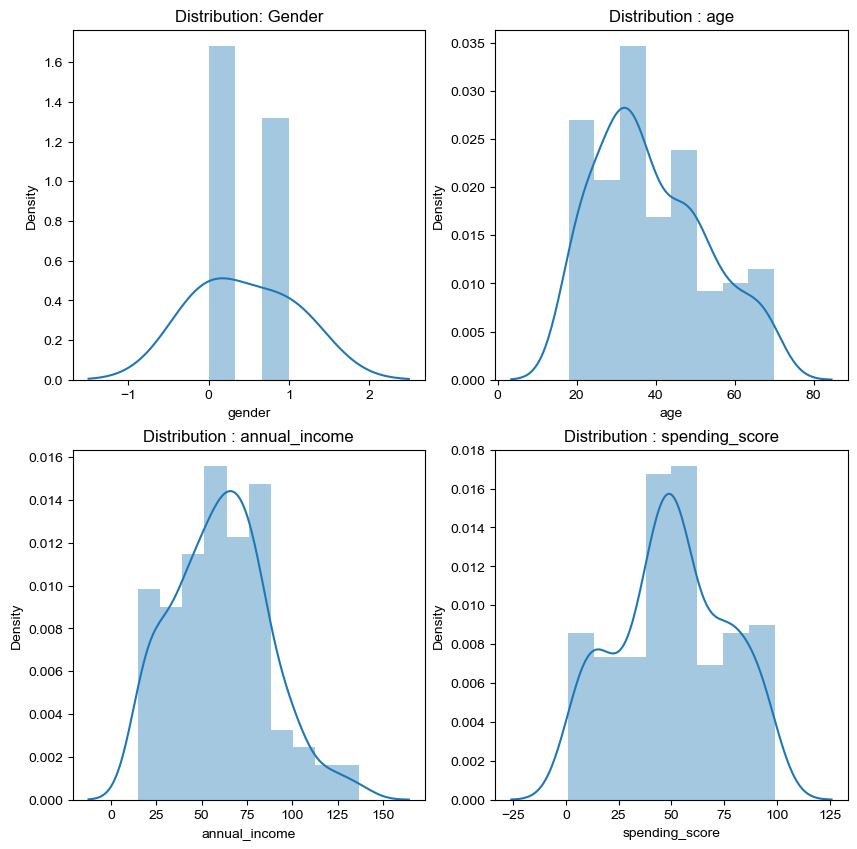

In [167]:
plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.distplot(df2['gender'], kde_kws={'bw': 1})
plt.title('Distribution: Gender')

for i, name in enumerate(['age', 'annual_income', 'spending_score']):
    plt.subplot(2, 2, i+2)
    sns.distplot(df2[name])
    title = 'Distribution : ' + name
    plt.title(title)
plt.show()

* `Gender` looks normally distributed
* Both `Age` and `Annual Income` are positively skewed
* `Spending Score` is similar to the **Head and Shoulders** pattern. The two shoulders are around spending score **20** and **80** respectively, where the head is at **50**

### Gender

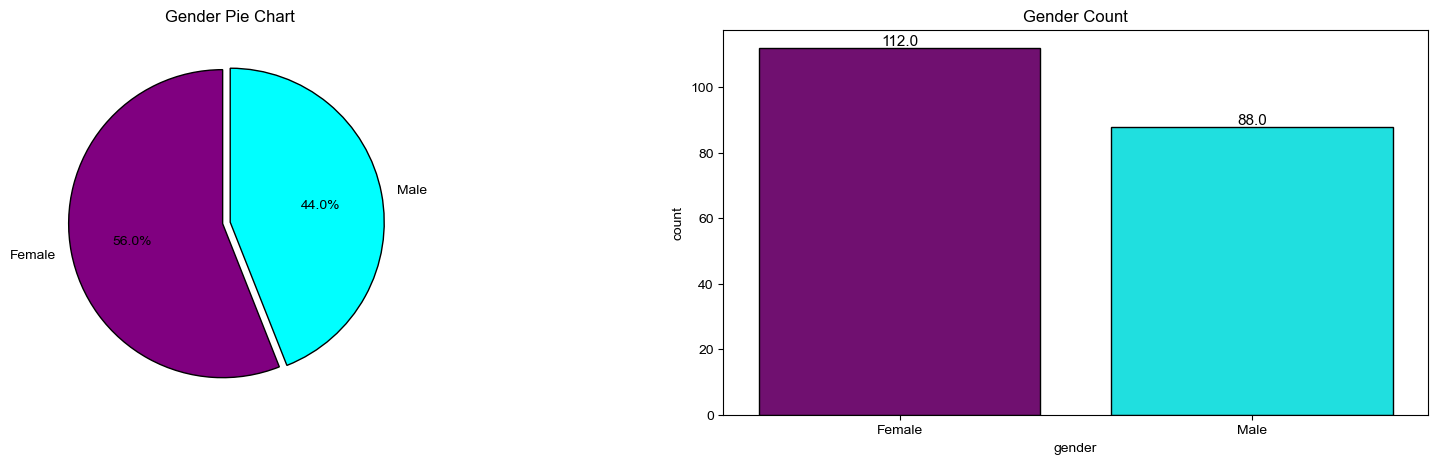

In [168]:
colors = ['purple', 'cyan']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.pie(df2['gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90, explode=(0.05, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Gender Pie Chart')

plt.subplot(1, 2, 2)
ax = sns.countplot(x='gender', data=df2,  edgecolor='black', palette=colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() +
            0.75, rect.get_height(), horizontalalignment='center', fontsize=11)
plt.title('Gender Count')
ax.set_xticklabels(['Female', 'Male'])

plt.show()

* **Female** customers are slightly more than **Male** Customers

### Gender vs other features

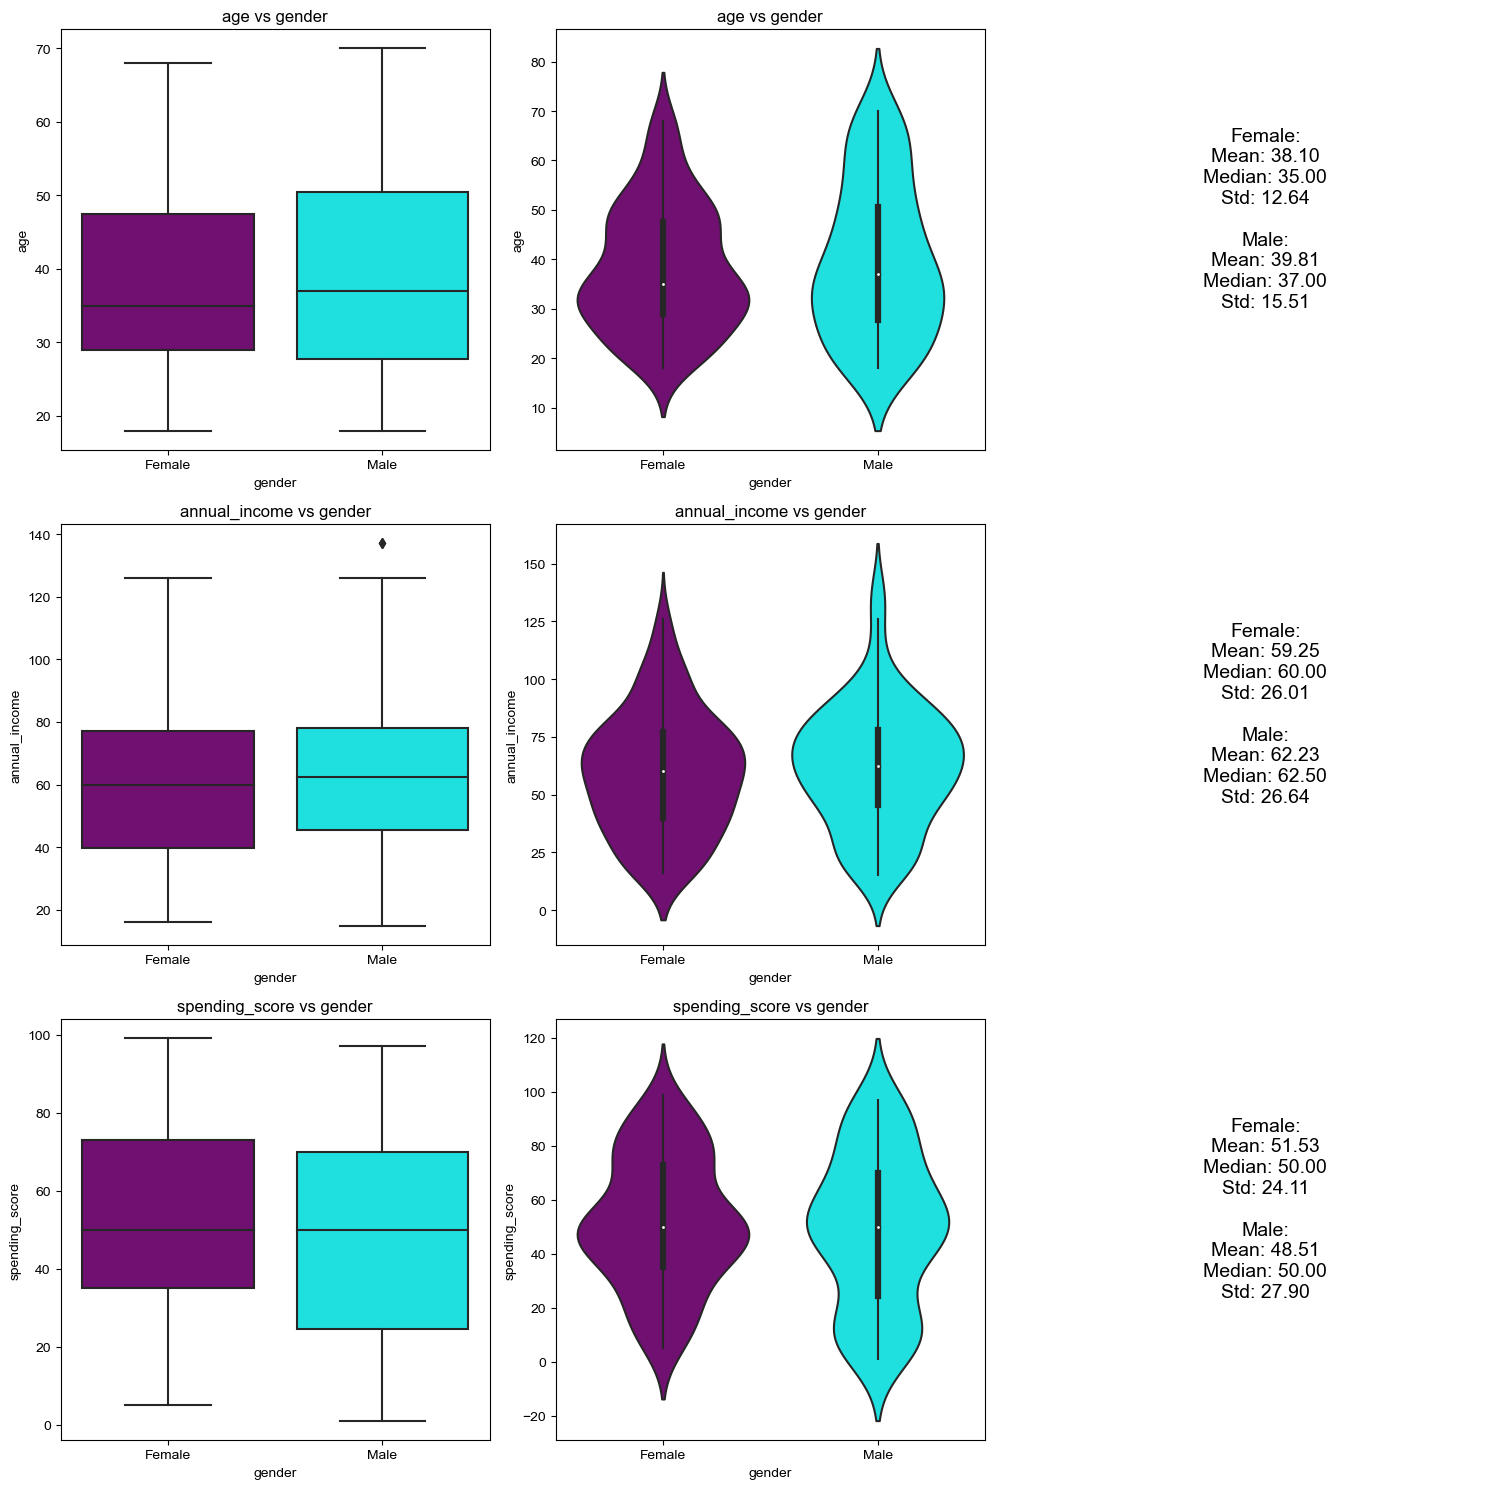

In [169]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, name in enumerate(['age', 'annual_income', 'spending_score']):
    ax_boxplot = plt.subplot(3, 3, (i * 3) + 1)
    ax_violinplot = plt.subplot(3, 3, (i * 3) + 2)
    ax_statistics = plt.subplot(3, 3, (i * 3) + 3)

    # Create boxplot
    sns.boxplot(x='gender', y=name, data=df2, palette=colors, ax=ax_boxplot)
    ax_boxplot.set_xticklabels(['Female', 'Male'])
    title_boxplot = name + ' vs gender'
    ax_boxplot.set_title(title_boxplot)

    # Create violinplot
    sns.violinplot(x='gender', y=name, data=df2,
                   palette=colors, ax=ax_violinplot)
    ax_violinplot.set_xticklabels(['Female', 'Male'])
    title_violinplot = name + ' vs gender'
    ax_violinplot.set_title(title_violinplot)

    # Calculate and display statistics
    mean_value = df2.groupby('gender')[name].mean()
    median_value = df2.groupby('gender')[name].median()
    std_value = df2.groupby('gender')[name].std()

    statistics_text = ''
    for gender, mean, median, std in zip(['Female', 'Male'], mean_value, median_value, std_value):

        statistics_text += f'{gender}:\nMean: {mean:.2f}\nMedian: {median:.2f}\nStd: {std:.2f}\n\n'

    ax_statistics.text(0.5, 0.5, statistics_text, ha='center',
                       va='center', fontsize=14, color='black')
    ax_statistics.axis('off')

plt.tight_layout()
plt.show()

##### 1. `Age`
- The average age of male customers is lightly higher than female ones **(39.8 vs 38.1)**.

##### 2. `Annual Income (k$)`
- Mean income of males is higher than females **(62.2 k$ vs. 59.2k\$)**.
- Median income of male customers **(62.5k$)** is higher thn female ones **(60k\$)**.
- Standard deviation is similar for both groups. There is one outlier in male group with an annual income of about 140k$.

##### 3. `Spending Score (1-100)`
- Mean spending score for women **(51.5)** is higher than men **(48.5)**.

### Correlations

Text(0.5, 1.0, 'Annual Income (k$) vs Spending Score (1-100)')

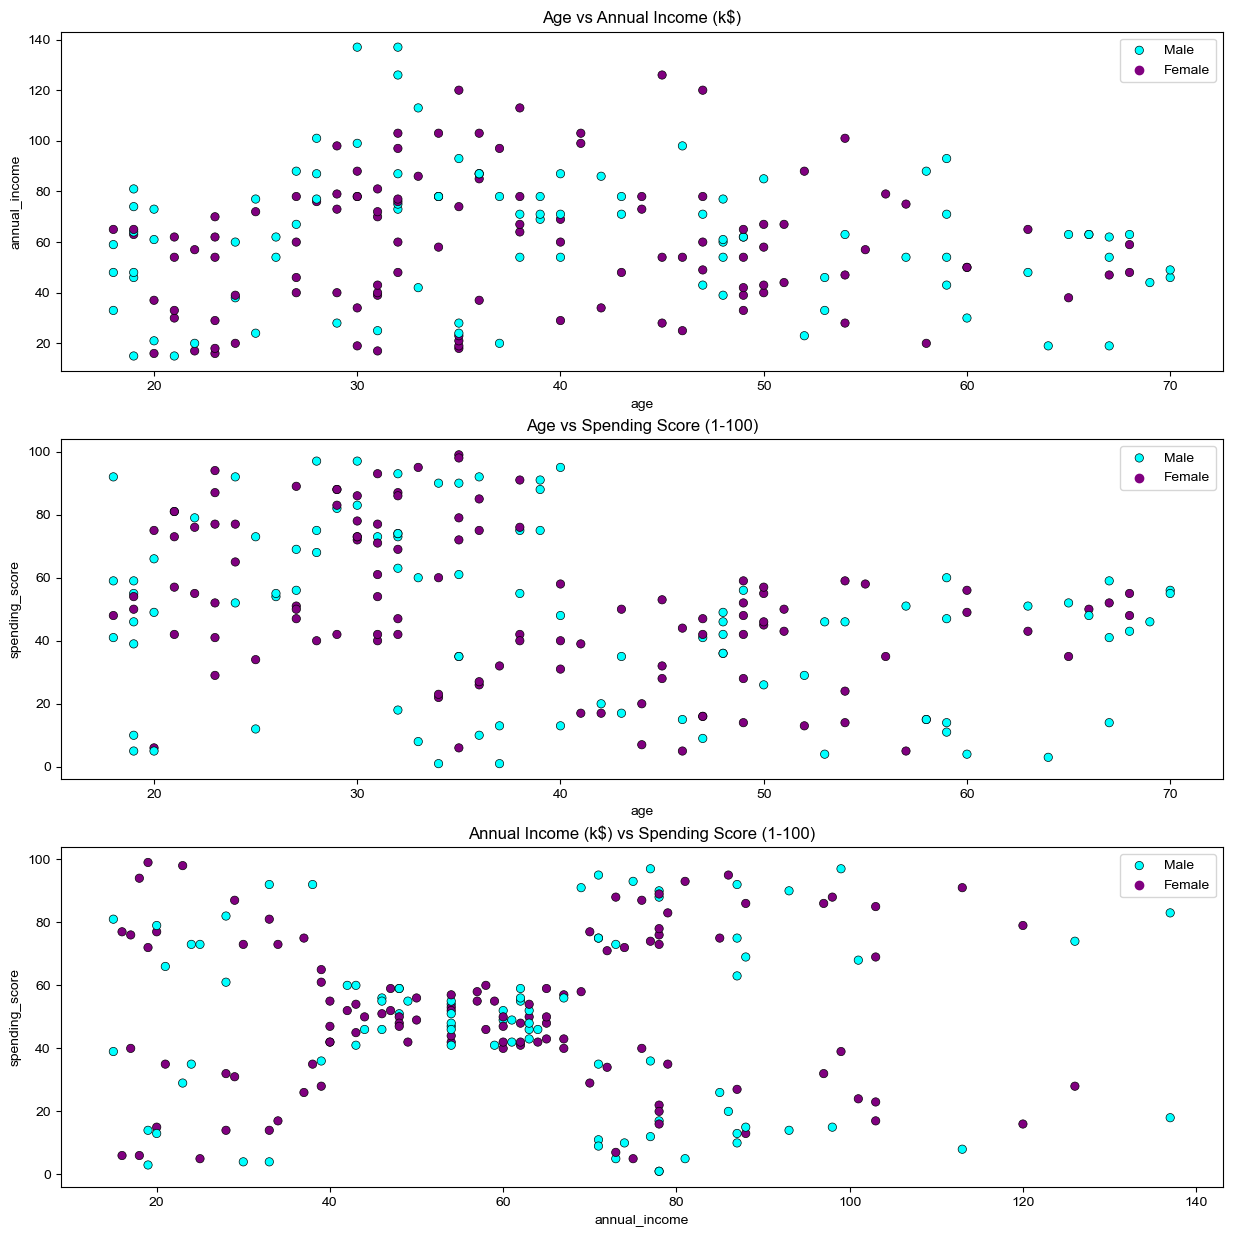

In [170]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

plt.subplot(3, 1, 1)
sns.scatterplot(x='age', y='annual_income', data=df2,
                hue='gender', palette=colors, edgecolor='black')
plt.legend(labels=['Male', 'Female'])
plt.title('Age vs Annual Income (k$)')

plt.subplot(3, 1, 2)
sns.scatterplot(x='age', y='spending_score', data=df2,
                hue='gender', palette=colors, edgecolor='black')
plt.legend(labels=['Male', 'Female'])
plt.title('Age vs Spending Score (1-100)')

plt.subplot(3, 1, 3)
sns.scatterplot(x='annual_income', y='spending_score', data=df2,
                hue='gender', palette=colors, edgecolor='black')
plt.legend(labels=['Male', 'Female'])
plt.title('Annual Income (k$) vs Spending Score (1-100)')

- No significant information can be observed from the `age` vs `annual income` graph.
- The `age` vs `spending score` graph shows that the spending score is higher for younger people (20-40).
- Lower `spending score` can be observed for older people (40-70).
- The `annual income` vs `spending score` graph shows **5** distinct clusters.

### Correlation Matrix

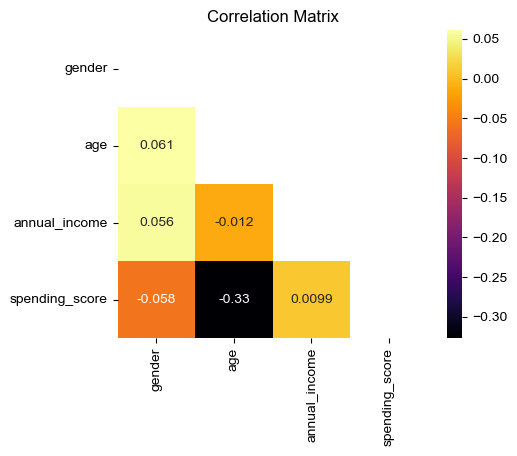

In [171]:
ut = np.triu(df2.corr())

plt.figure(figsize=(5, 4))
sns.heatmap(df2.corr(), cmap='inferno', annot=True, cbar='True', mask=ut)
plt.title('Correlation Matrix')

plt.show()

- `Gender` doesn't show any relation with any other feature.
- `Age` is negatively correlated with `Spending Score` (if one increases the other decreases and vice-versa).
- The information gathered from the correlation matrix matches the information gathered from the previous plots!

## <center> Clustering using K-Means </center>

### Data Scaling

- The scales of the values in our dataset do not vary much, but it never hurts to be careful.
- We will scale the data using Normalization.
- `MinMaxScaler()` will be used.
- Scaling will be carried out on `age`, `annual_income` and `spending_score` columns.

***we will implement k-means on both the scaled and unscaled datasets and compare the results.***

In [172]:
mms = MinMaxScaler()

df3 = df2.copy()

# Normalizing features
df3[['age', 'annual_income', 'spending_score']] = mms.fit_transform(
    df3[['age', 'annual_income', 'spending_score']])

***Moving on to the next step***

### <center> Modeling </center>

#### Let's discuss ***K-Means*** and the next steps:

- **K-Means** is very commonly used for usecases similar to ours, it's simple and easy to implement and use.
- Main Steps of K-Means:
    - Select K random points from the dataset, which will act as the initial centroids.
    - Assign each data point to the closest centroid using Euclidean Distance.
    - Calculate and Place the new centroid of each cluster.
    - Repeat the second and third steps until none of the cluster assignments change.

- To choose the optimal value for **K** we will use the **Elbow Method**.
    - The idea is to run K-Means clustering on the dataset for a range of values of K (let's say from 1 to 10), and for each value of K, we will calculate the **Within Cluster Sum of Squares (WCSS)** also known as **Sum of Squared Errors (SSE)** or **inertia**.
    - After that, we will plot a line chart of the WCSS for each value of K.
    - The location of the "elbow" in the plot is generally considered as an indicator of the appropriate number of clusters.

- ***We will create models on different combinations of features and finally choose the best model for our usecase.***

In [173]:
### Dropping the categorical columns
df2.drop(columns='gender', inplace=True)
df3.drop(columns='gender', inplace=True)

### 1. Using Age and Annual Income

In [174]:
m1 = df2[['age', 'annual_income']].values  # Original Dataset
m2 = df3[['age', 'annual_income']].values  # Normalized Dataset

#### 1.1 Normalized Dataset

Text(0, 0.5, 'Sum of Squared Error')

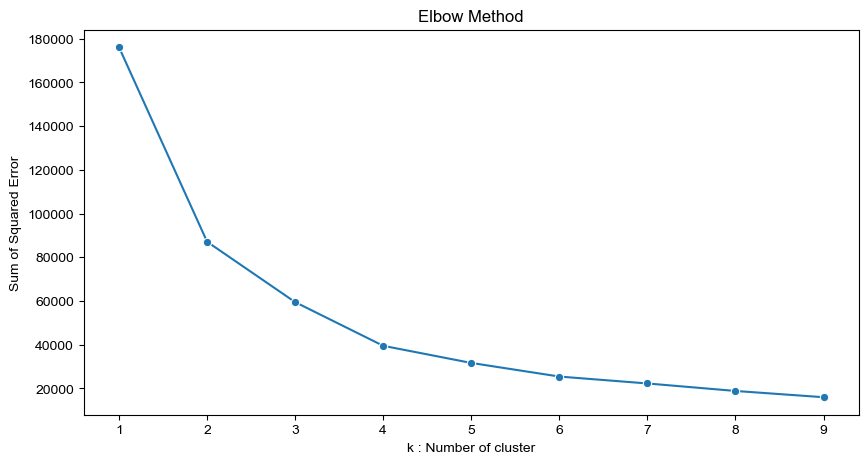

In [175]:
sse = {}
kmax = 10
plt.figure(figsize=(10, 5))

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1)
    # Inertia: Sum of distances of samples to their closest cluster center
    sse[k] = kmeans.inertia_
sns.lineplot(x=list(sse.keys()), y=list(sse.values()), marker='o')
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

- From the plot, the best value for **k** is **4**

***Implementing the model***

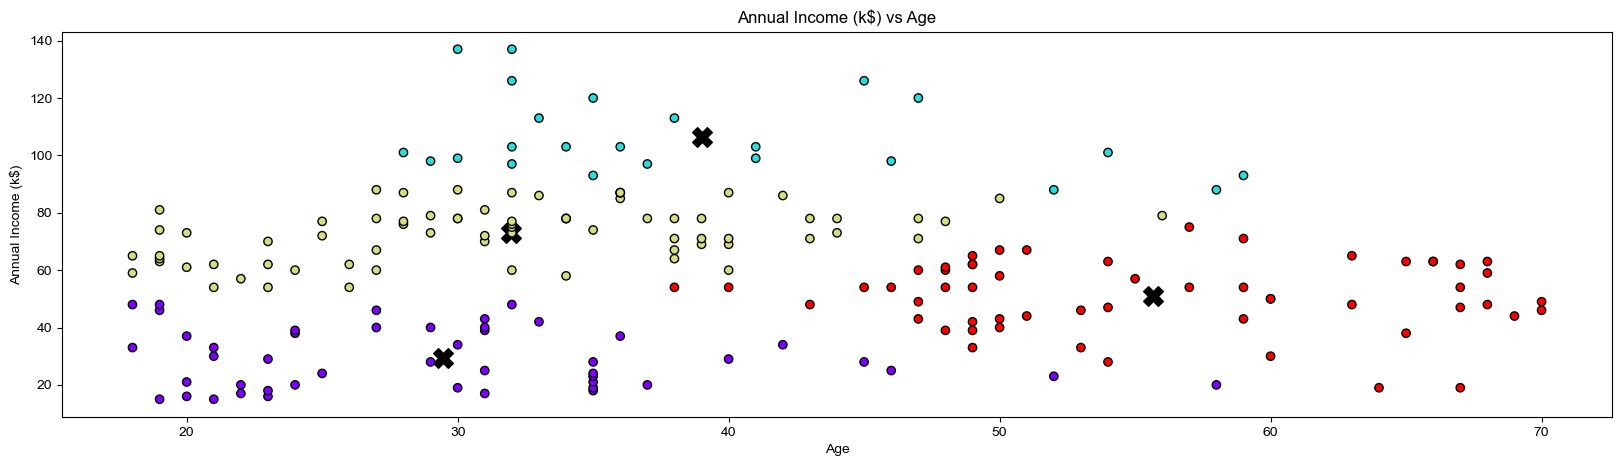

In [176]:
model = KMeans(n_clusters = 4)
model.fit(m1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

plt.figure(figsize = (20,5))
plt.scatter(centroids[:,0],centroids[:,1], marker = "X", color = 'black', s = 200)
plt.scatter(x = 'age',y = 'annual_income',c = labels,cmap = 'rainbow',data = df2,edgecolor = 'black')
plt.title('Annual Income (k$) vs Age')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

#### 1.2 Normalized Dataset

Text(0, 0.5, 'Sum of Squared Error')

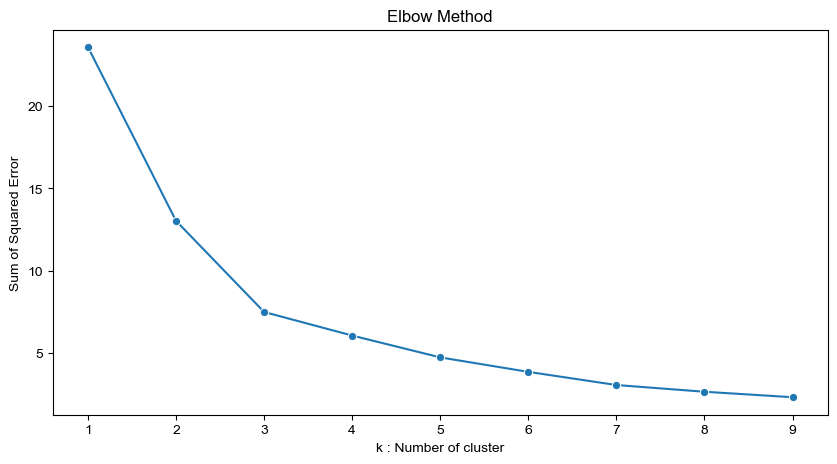

In [177]:
sse = {}
kmax = 10
plt.figure(figsize=(10, 5))

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m2)
    # Inertia: Sum of distances of samples to their closest cluster center
    sse[k] = kmeans.inertia_
sns.lineplot(x=list(sse.keys()), y=list(sse.values()), marker='o')
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

- From the plot, the best value for **k** is **3**

***Implementing the model***

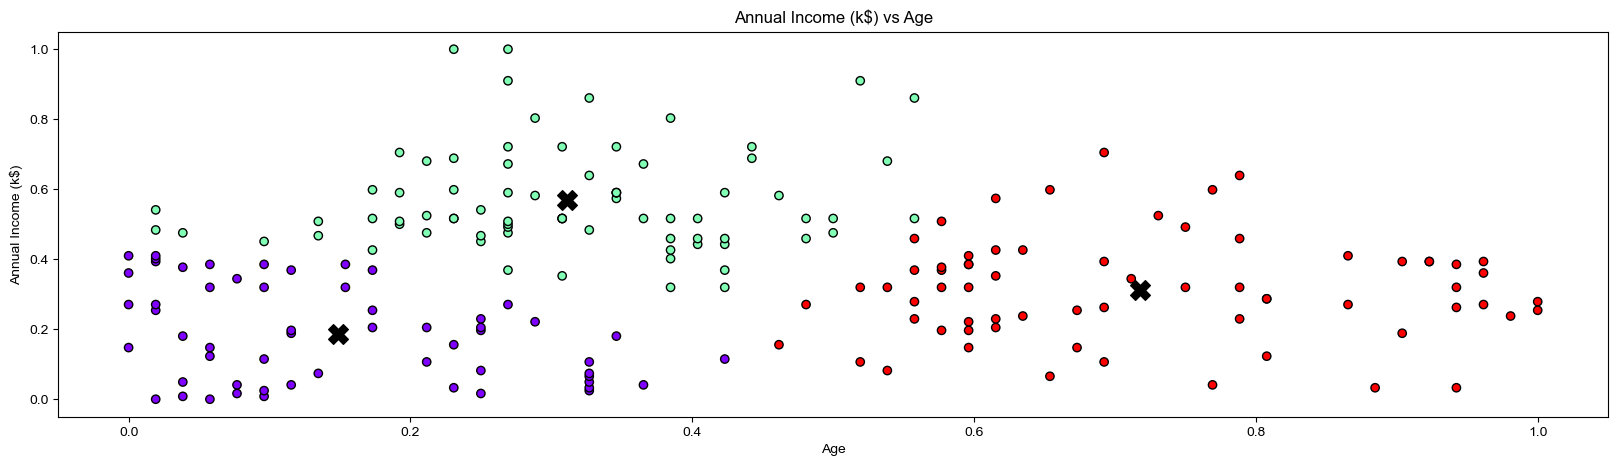

In [178]:
model = KMeans(n_clusters = 3)
model.fit(m2)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

plt.figure(figsize = (20,5))
plt.scatter(centroids[:,0],centroids[:,1], marker = "X", color = 'black', s = 200)
plt.scatter(x = 'age',y = 'annual_income',c = labels,cmap = 'rainbow',data = df3,edgecolor = 'black')
plt.title('Annual Income (k$) vs Age')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

### 2. Using Age and Spending Score

In [179]:
m1 = df2[['age', 'spending_score']].values  # Original Dataset
m2 = df3[['age', 'spending_score']].values  # Normalized Dataset

##### 2.1 Original Dataset

Text(0, 0.5, 'Sum of Squared Error')

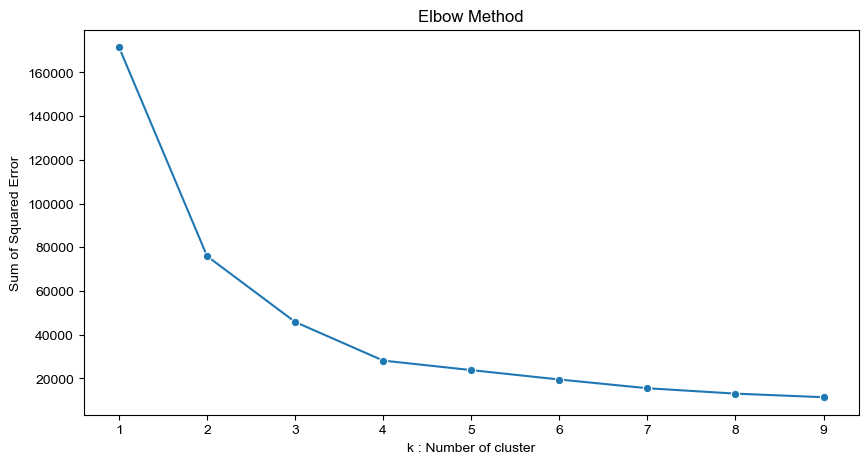

In [180]:
sse = {}
kmax = 10
plt.figure(figsize=(10, 5))

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1)
    # Inertia: Sum of distances of samples to their closest cluster center
    sse[k] = kmeans.inertia_
sns.lineplot(x=list(sse.keys()), y=list(sse.values()), marker='o')
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

- From the plot, the best value for **k** is **4**

***Implementing the model***

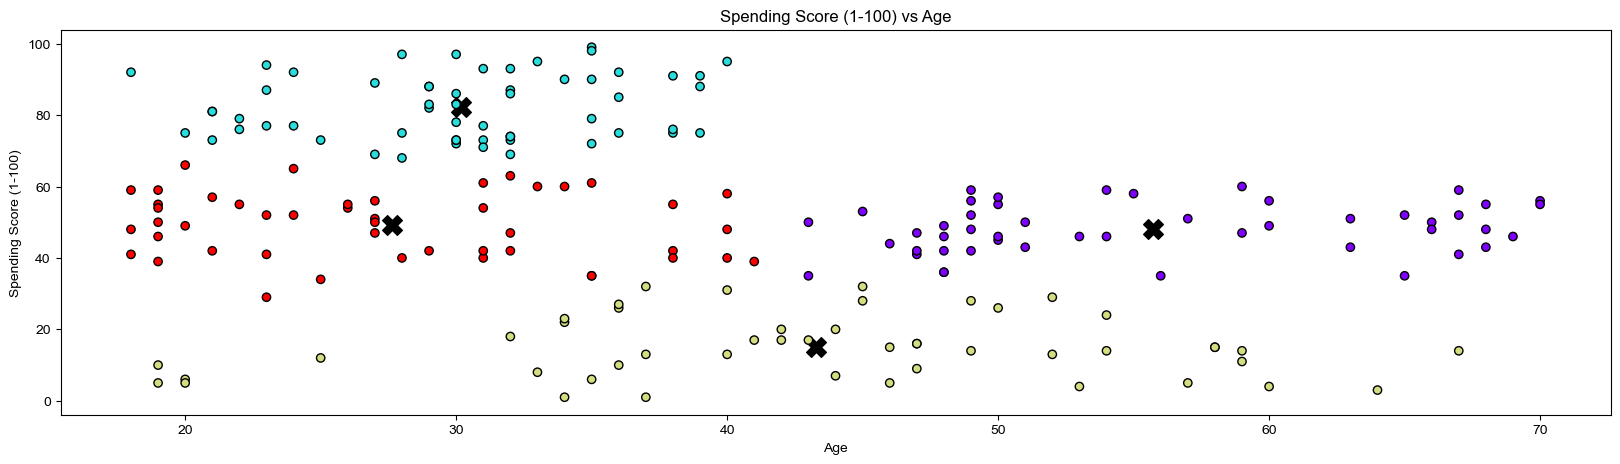

In [181]:
model = KMeans(n_clusters = 4)
model.fit(m1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

plt.figure(figsize = (20,5))
plt.scatter(centroids[:,0],centroids[:,1], marker = "X", color = 'black', s = 200)
plt.scatter(x = 'age',y = 'spending_score',c = labels,cmap = 'rainbow',data = df2,edgecolor = 'black')
plt.title('Spending Score (1-100) vs Age')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

#### 2.2 Normalized Dataset

Text(0, 0.5, 'Sum of Squared Error')

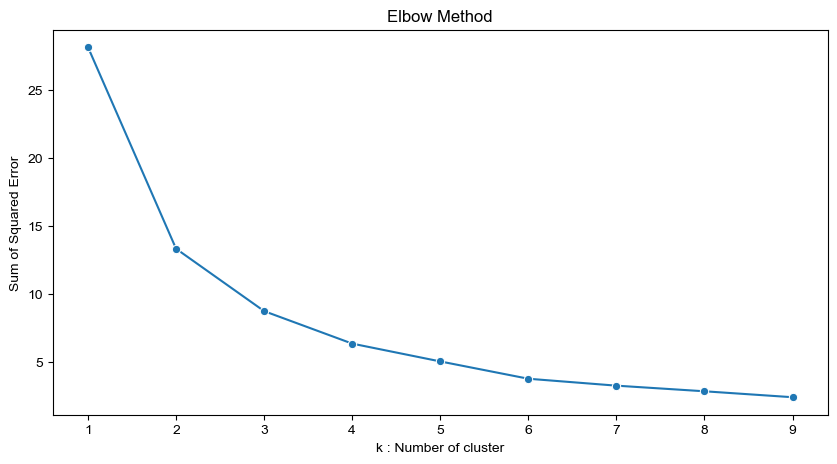

In [182]:
sse = {}
kmax = 10
plt.figure(figsize=(10, 5))

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m2)
    # Inertia: Sum of distances of samples to their closest cluster center
    sse[k] = kmeans.inertia_
sns.lineplot(x=list(sse.keys()), y=list(sse.values()), marker='o')
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

- From the plot, the best value for **k** is **4**

***Implementing the model***

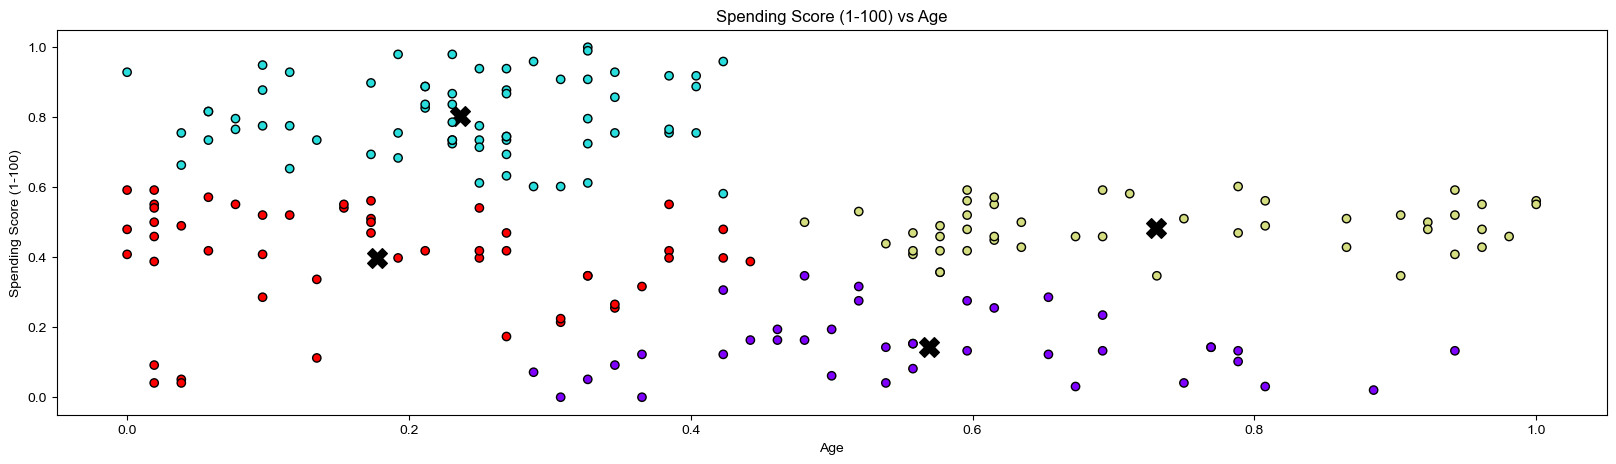

In [183]:
model = KMeans(n_clusters = 4)
model.fit(m2)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

plt.figure(figsize = (20,5))
plt.scatter(centroids[:,0],centroids[:,1], marker = "X", color = 'black', s = 200)
plt.scatter(x = 'age',y = 'spending_score',c = labels,cmap = 'rainbow',data = df3,edgecolor = 'black')
plt.title('Spending Score (1-100) vs Age')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

### 3. Using Annual Income and Spending Score

In [184]:
m1 = df2[['annual_income', 'spending_score']].values  # Original Dataset
m2 = df3[['annual_income', 'spending_score']].values  # Normalized Dataset

##### 3.1 Original Dataset

Text(0, 0.5, 'Sum of Squared Error')

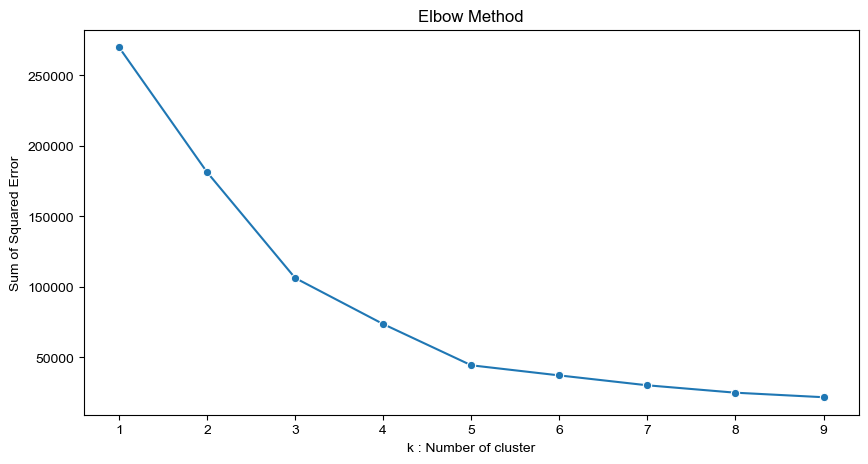

In [185]:
sse = {}
kmax = 10
plt.figure(figsize=(10, 5))

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1)
    # Inertia: Sum of distances of samples to their closest cluster center
    sse[k] = kmeans.inertia_
sns.lineplot(x=list(sse.keys()), y=list(sse.values()), marker='o')
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

- From the plot, the best value for **k** is **5**

***Implementing the model***

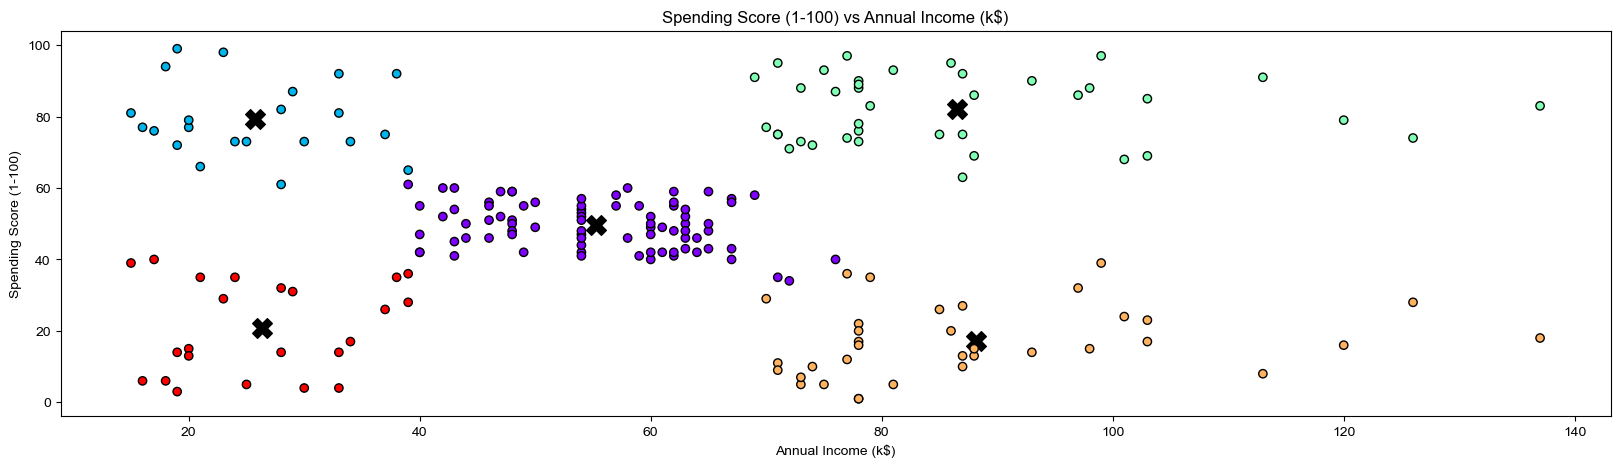

In [186]:
model = KMeans(n_clusters=5)
model.fit(m1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

plt.figure(figsize=(20, 5))
plt.scatter(centroids[:, 0], centroids[:, 1], marker="X", color='black', s=200)
plt.scatter(x='annual_income', y='spending_score', c=labels,
            cmap='rainbow', data=df2, edgecolor='black')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

#### 3.2 Normalized Dataset

Text(0, 0.5, 'Sum of Squared Error')

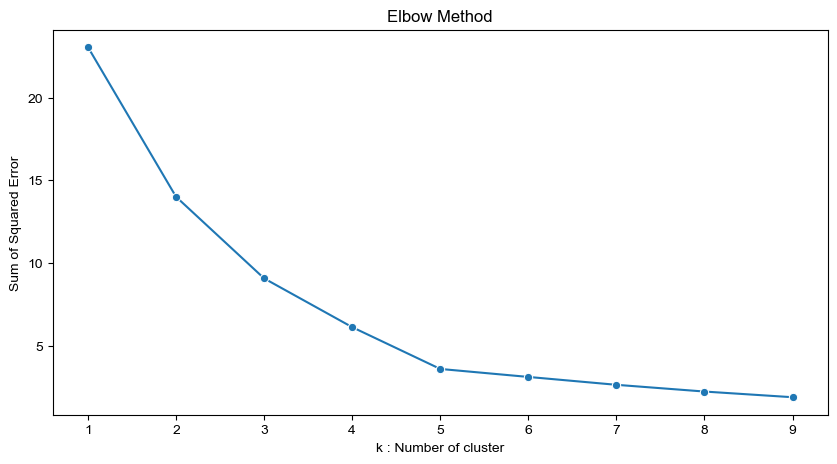

In [187]:
sse = {}
kmax = 10
plt.figure(figsize=(10, 5))

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m2)
    # Inertia: Sum of distances of samples to their closest cluster center
    sse[k] = kmeans.inertia_
sns.lineplot(x=list(sse.keys()), y=list(sse.values()), marker='o')
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

- From the plot, the best value for **k** is **5**

***Implementing the model***

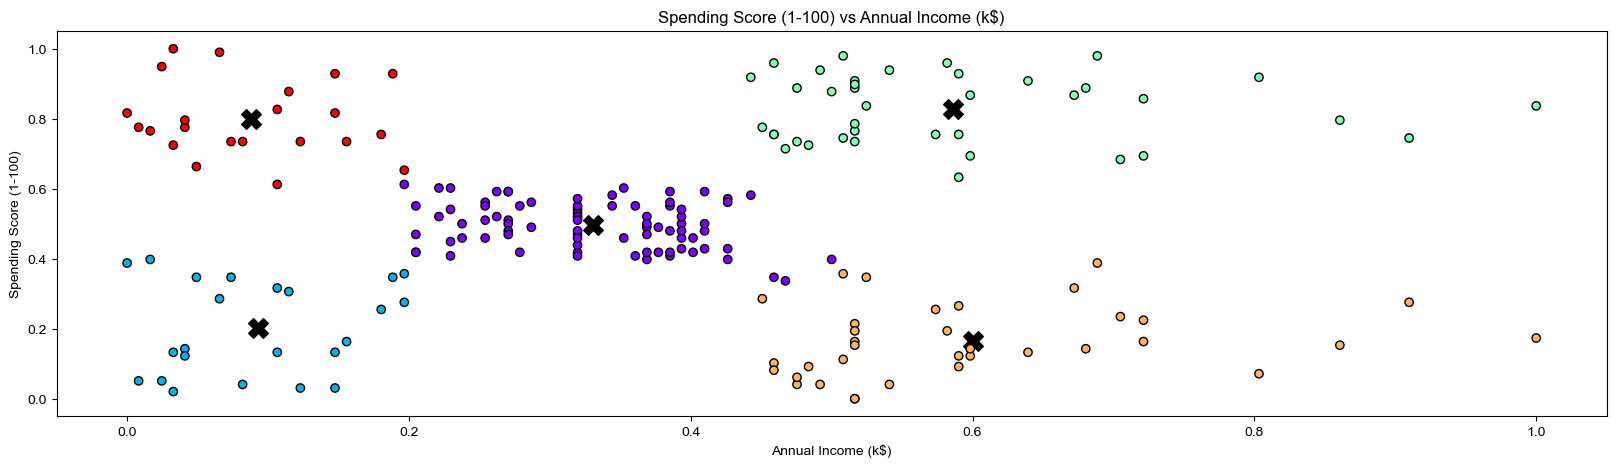

In [188]:
model = KMeans(n_clusters=5)
model.fit(m2)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

plt.figure(figsize=(20, 5))
plt.scatter(centroids[:, 0], centroids[:, 1], marker="X", color='black', s=200)
plt.scatter(x='annual_income', y='spending_score', c=labels,
            cmap='rainbow', data=df3, edgecolor='black')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### 4. Using Annual Income, Spending Score, and Age

In [189]:
m1 = df2[['age', 'annual_income', 'spending_score']].values  # Original Dataset
m2 = df3[['age', 'annual_income', 'spending_score']
         ].values  # Normalized Dataset

##### 4.1 Original Dataset

Text(0, 0.5, 'Sum of Squared Error')

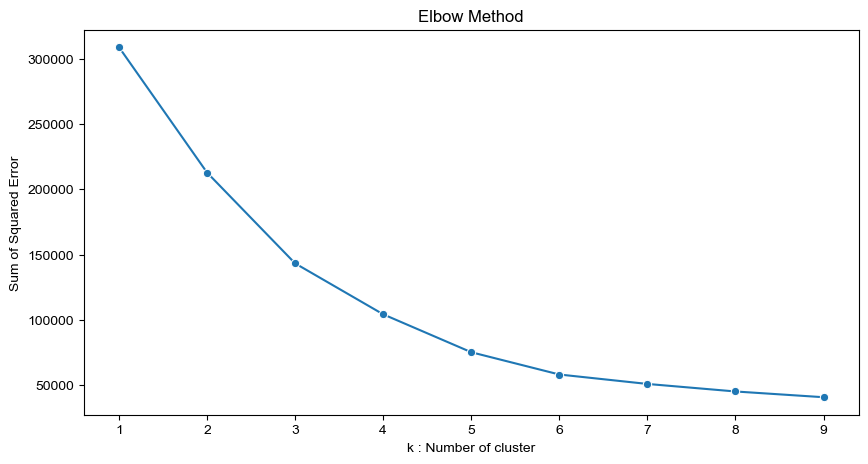

In [190]:
sse = {}
kmax = 10
plt.figure(figsize=(10, 5))

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1)
    # Inertia: Sum of distances of samples to their closest cluster center
    sse[k] = kmeans.inertia_
sns.lineplot(x=list(sse.keys()), y=list(sse.values()), marker='o')
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

- From the plot, the best value for **k** is **5**

***Implementing the model***

In [191]:
model = KMeans(n_clusters=5, max_iter=1000)
model.fit(m1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

x = np.array(df2['annual_income'])
y = np.array(df2['spending_score'])
z = np.array(df2['age'])

scatter_data = [
    go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(
        size=5, color=y), name='Data Points'),
    go.Scatter3d(x=centroids[:, 0], y=centroids[:, 1], z=centroids[:, 2],
                 mode='markers', marker=dict(size=10, color='red', symbol='cross'), name='Centroids')
]

layout = go.Layout(
    scene=dict(xaxis_title='Annual Income (k$)',
               yaxis_title='Spending Score (1-100)', zaxis_title='Age'),
    title='Spending Score (1-100) vs Annual Income (k$) vs Age'
)

fig = go.Figure(data=scatter_data, layout=layout)
fig.show()

#### 3.2 Normalized Dataset

Text(0, 0.5, 'Sum of Squared Error')

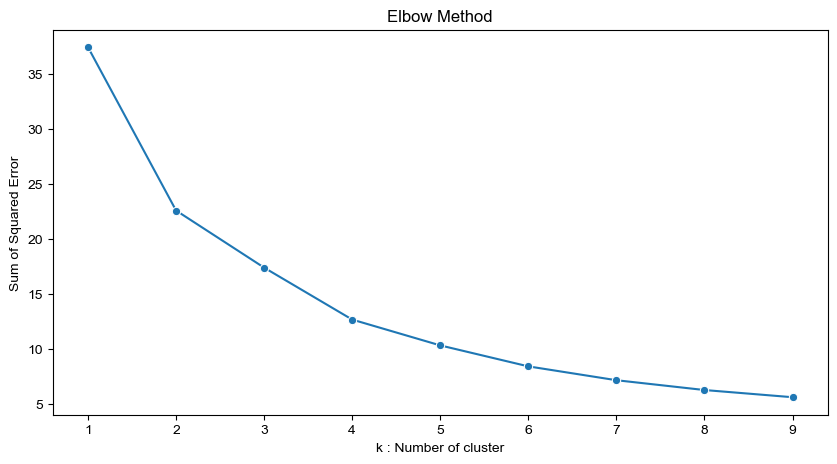

In [192]:
sse = {}
kmax = 10
plt.figure(figsize=(10, 5))

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m2)
    # Inertia: Sum of distances of samples to their closest cluster center
    sse[k] = kmeans.inertia_
sns.lineplot(x=list(sse.keys()), y=list(sse.values()), marker='o')
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

- From the plot, the best value for **k** is **6**

***Implementing the model***

In [193]:
model = KMeans(n_clusters=6, max_iter=1000)
model.fit(m2)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_

x = np.array(df3['annual_income'])
y = np.array(df3['spending_score'])
z = np.array(df3['age'])

scatter_data = [
    go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(
        size=5, color=y), name='Data Points'),
    go.Scatter3d(x=centroids[:, 0], y=centroids[:, 1], z=centroids[:, 2],
                 mode='markers', marker=dict(size=10, color='red', symbol='cross'), name='Centroids')
]

layout = go.Layout(
    scene=dict(xaxis_title='Annual Income (k$)',
               yaxis_title='Spending Score (1-100)', zaxis_title='Age'),
    title='Spending Score (1-100) vs Annual Income (k$) vs Age'
)

fig = go.Figure(data=scatter_data, layout=layout)
fig.show()

## <center> Conclusion </center>

###### <span style='color:red'>  I wrote this and asked chatgpt to add some humor to it. It turned out suprisingly funny. I hope you enjoy it as much as I did. </span>

- This dataset is like a treasure map for unsupervised learning adventurers. It's our chance to crack the code and uncover secrets that can skyrocket sales and bring out the business genius in us.

- In the world of unsupervised learning, Exploratory Data Analysis (EDA) is our Sherlock Holmes. It helps us find hidden patterns in the data, like discovering a message in a bottle on a deserted island. But, just like trying to read the message through a foggy bottle, things can get blurry when we're dealing with loads of data.

- Here's where the K-Means clustering wizard comes in. It's like a sorting hat for data, magically putting similar things into groups. But beware, picking the right number of groups is like guessing the number of candies in a jar – you either use a bit of math magic or trust your gut feeling.

- Now, hold onto your hats – whether we look at the original data or its spiffed-up version, the K-Means magic stays strong. It's like your favorite recipe turning out delicious whether you use fancy organic ingredients or good ol' pantry staples.

- So, here's the deal: this dataset isn't just data, it's an adventure. It's where you become a data detective and a clustering conjurer, all while having a good laugh at how mysterious and cool data can be.